In [1]:
# Competition hosted by Kaggle
# URL: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
# Predicting the sales price of a house, using Tensorflow 2.0 Artificial Neural Networks.

In [2]:
#%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.show()
%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
combine = [train,test]

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

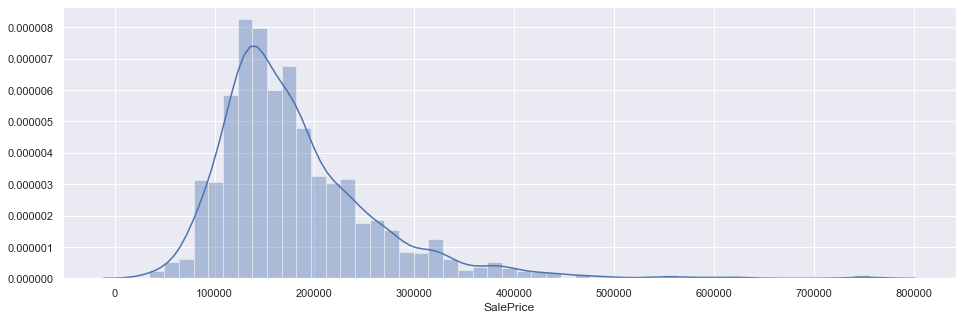

In [7]:
plt.figure(figsize=(16,5))
sns.distplot(train['SalePrice'])

In [8]:
train.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [9]:
# Visualising correlation between numerical variables.

In [10]:
corr_matrix = train.corr()

In [11]:
columns = corr_matrix.nlargest(10,'SalePrice')['SalePrice'].index

In [12]:
cm = np.corrcoef(train[columns].values.T)

(10, 0)

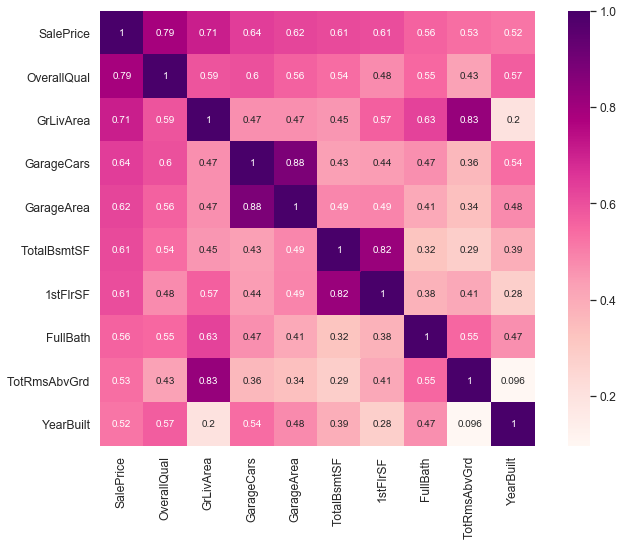

In [13]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.1)
sns.heatmap(cm,cbar=True, annot = True, square=True, cmap = "RdPu",annot_kws = {"size": 10},
           yticklabels=columns.values, xticklabels=columns.values)
plt.ylim(10,0)

In [14]:
# Graphs for the top couple of correlated variables to see if there are any outliers. 

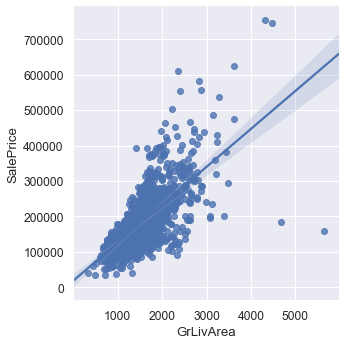

In [15]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

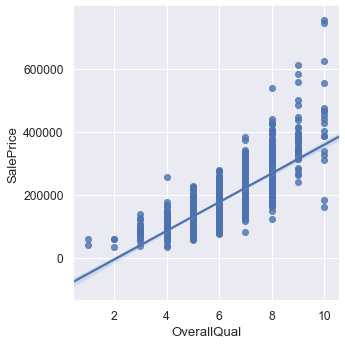

In [16]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

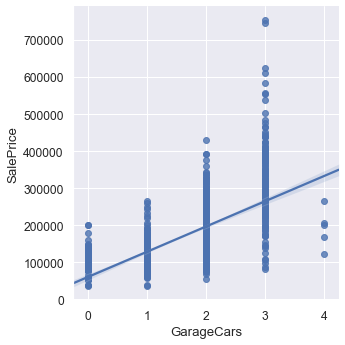

In [17]:
sns.lmplot(x='GarageCars',y='SalePrice',data=train)

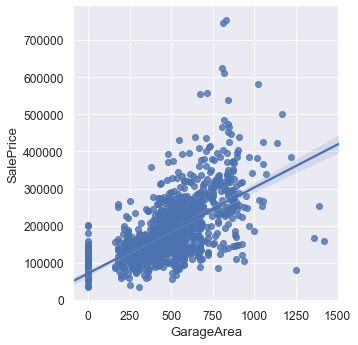

In [18]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

In [19]:
train.loc[train['GrLivArea'] > 4000,['GrLivArea','SalePrice']]

GrLivArea  SalePrice
523        4676     184750
691        4316     755000
1182       4476     745000
1298       5642     160000

In [20]:
# Drop the outliers found in the first graph
train.drop(523,inplace=True)
train.drop(1298,inplace=True)

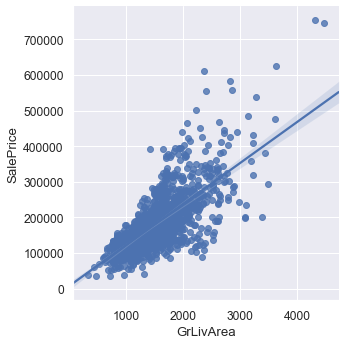

In [21]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

In [22]:
train.loc[train['GrLivArea'] > 4000,['GrLivArea','SalePrice']]

GrLivArea  SalePrice
691        4316     755000
1182       4476     745000

In [23]:
for dataset in combine:
    print(pd.isna(dataset).sum().nlargest(40))

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
dtype: int64
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78


In [24]:
# Filling in the missing values Most of these will be a simple fix.

In [25]:
# Working on the train set

In [26]:
pd.isna(train).sum().nlargest(32)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
dtype: int64

In [27]:
# PoolQC NA represent no pool, so lets fill that in. 

In [28]:
NoneFill = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure','GarageQual','GarageCond',
           'BsmtExposure','MasVnrType']
for column in NoneFill:
    train[column].fillna("None",inplace=True)
    pd.isna(train[NoneFill]).sum()

In [29]:
# I will have to impute the value for LotFrontage.
# I could look at the average lotfrontage for the neighbourhood.

In [30]:
# Fills in NA values using average LotFrontage for each neighborhood.
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [31]:
train['GarageYrBlt'].fillna(0,inplace=True)
pd.isna(train['GarageYrBlt']).sum()

0

In [32]:
pd.isna(train).sum().nlargest(10)

MasVnrArea     8
Electrical     1
Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
dtype: int64

In [33]:
train['MasVnrArea'].fillna(0,inplace=True)
pd.isna(train['MasVnrArea']).sum()

0

In [34]:
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

In [35]:
pd.isna(train).sum().nlargest(10)

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

In [36]:
# Now I will begin filling in the missing values for the test set
pd.isna(test).sum().nlargest(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Exterior1st        1
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
KitchenQual        1
GarageCars         1
GarageArea         1
SaleType           1
Id                 0
MSSubClass         0
dtype: int64

In [37]:
# Fill missing values with None
fillnone = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageType',
           'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [38]:
for i in fillnone:
    test[i].fillna('None',inplace=True)
    print(pd.isna(test[i]).sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [39]:
pd.isna(test).sum().nlargest(20)

LotFrontage     227
GarageYrBlt      78
MasVnrType       16
MasVnrArea       15
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
GarageArea        1
SaleType          1
Id                0
dtype: int64

In [40]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

MasVnrType  MasVnrArea
231         NaN         NaN
246         NaN         NaN
422         NaN         NaN
532         NaN         NaN
544         NaN         NaN
581         NaN         NaN
851         NaN         NaN
865         NaN         NaN
880         NaN         NaN
889         NaN         NaN
908         NaN         NaN
1132        NaN         NaN
1150        NaN       198.0
1197        NaN         NaN
1226        NaN         NaN
1402        NaN         NaN

In [41]:
test.loc[test['MasVnrArea'] == 198.0, 'MasVnrType']

245       Stone
421     BrkFace
1085      Stone
1150        NaN
1372    BrkFace
1442      Stone
Name: MasVnrType, dtype: object

In [42]:
test.iloc[1150]

Id                  2611
MSSubClass            20
MSZoning              RL
LotFrontage          124
LotArea            27697
                  ...   
MiscVal                0
MoSold                11
YrSold              2007
SaleType             COD
SaleCondition    Abnorml
Name: 1150, Length: 80, dtype: object

In [43]:
test.loc[test['Id'] == 2611,'MasVnrType'] = 'Stone'

In [44]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

MasVnrType  MasVnrArea
231         NaN         NaN
246         NaN         NaN
422         NaN         NaN
532         NaN         NaN
544         NaN         NaN
581         NaN         NaN
851         NaN         NaN
865         NaN         NaN
880         NaN         NaN
889         NaN         NaN
908         NaN         NaN
1132        NaN         NaN
1197        NaN         NaN
1226        NaN         NaN
1402        NaN         NaN

In [45]:
test['MasVnrType'].fillna('None',inplace=True)
print(pd.isna(test['MasVnrType']).sum())

test['MasVnrArea'].fillna(0,inplace=True)
print(pd.isna(test['MasVnrArea']).sum())

0
0


In [46]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

Empty DataFrame
Columns: [MasVnrType, MasVnrArea]
Index: []

In [47]:
pd.isna(test).sum().nlargest(20)

LotFrontage     227
GarageYrBlt      78
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
GarageArea        1
SaleType          1
Id                0
MSSubClass        0
LotArea           0
dtype: int64

In [48]:
# Carry on fixing null values. 

# Then start making all the data model friendly. (Dummy variables, label encoder)

In [49]:
# Fill in the missing Lot Frontage values by using the average lot frontage for each neighbourhood
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [50]:
test['GarageYrBlt'].fillna(0,inplace=True)
pd.isna(test['GarageYrBlt']).sum()

0

In [51]:
# Fill in the missing MSZoning values by using the mode MSZoning for each MSSubClass
test['MSZoning'] = test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
pd.isna(test['MSZoning']).sum()

0

In [52]:
pd.isna(test).sum().nlargest(15)

Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
GarageCars      1
GarageArea      1
SaleType        1
Id              0
dtype: int64

In [53]:
modefill = ['Utilities','BsmtFullBath','BsmtHalfBath','Exterior1st','Exterior2nd','SaleType','KitchenQual']

for i in modefill:
    test[i].fillna(test[i].mode()[0],inplace = True)

In [54]:
pd.isna(test).sum().nlargest(9)

Functional     2
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
GarageCars     1
GarageArea     1
Id             0
MSSubClass     0
dtype: int64

In [55]:
test['Functional'].fillna('Typ',inplace = True) 

In [56]:
zerofill = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea']
for i in zerofill:
    test[i].fillna(0,inplace = True)

In [57]:
pd.isna(test).sum().nlargest(3)

Id            0
MSSubClass    0
MSZoning      0
dtype: int64

In [58]:
# Done with all the NA values

In [59]:
# Fix skewed variables
from scipy import stats

In [60]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = list(train.select_dtypes(include=numeric_dtypes).drop('SalePrice',axis=1).columns)

In [61]:
num_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [62]:
full_df = train.append(test)

In [63]:
skew_features = full_df[num_features].apply(lambda x: stats.skew(x)).sort_values(ascending=False)

In [64]:
skew_features = skew_features[abs(skew_features) > 0.75]
skew_features

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
MSSubClass        1.375131
1stFlrSF          1.257286
GrLivArea         1.068750
LotFrontage       1.056433
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
GarageYrBlt      -3.904632
dtype: float64

In [65]:
for feat in skew_features.index:
    full_df[feat] = np.log1p(full_df[feat])

In [66]:
ind = len(train)
train = full_df.iloc[:ind]
test = full_df.iloc[ind:]
combine = [train,test]

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
# Label encoding the following columns
encodecols = ['MSSubClass','Street','Alley','Utilities','LandSlope','ExterQual','ExterCond',
              'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
             'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',
              'GarageQual','GarageCond','PoolQC','Fence']
for dataset in combine:
    for i in encodecols:
        lbe = LabelEncoder()
        lbe.fit(list(dataset[i].values))
        dataset[i] = lbe.transform(list(dataset[i].values))

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [69]:
full_df = train.append(test)

In [70]:
full_df = pd.get_dummies(full_df,drop_first=True)

In [71]:
ind = len(train)

In [72]:
train = full_df.iloc[:ind]

In [73]:
test = full_df.iloc[ind:]

In [74]:
combine = [train,test]

In [75]:
temp_train_Id = train['Id']
temp_test_Id = test['Id']

In [76]:
for dataset in combine:
    dataset.drop('Id',axis=1,inplace=True)

C:\Users\clint\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,Normalizer,RobustScaler
scaler = StandardScaler()

In [78]:
# Scaling the data. Fitting and transforming on the train set, and only transforming the test set
pd.set_option('mode.chained_assignment',None)
for col in (train.columns):
    if col != 'SalePrice':
        train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
        test[col] = scaler.transform(test[col].values.reshape(-1,1))
        
    else:
        pass
pd.reset_option('mode.chained_assignment')
#train['SalePrice'] = scaler.fit_transform(train[col].values.reshape(-1,1))

In [79]:
test['SalePrice'] = test['SalePrice'].fillna(0)

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
train['SalePrice'] = train['SalePrice'].apply(lambda x: np.log(x))

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [82]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

X_new = np.asarray(X)
y_new = np.asarray(y)

In [83]:
# Importing the relevant tensorflow packages
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras

In [84]:
# Define a function that returns the model it compiles.
def build_model(hp):
    model = Sequential()
    
    # Hyperparameters tuning
    hp_units_first = hp.Int('input_units', min_value=4, max_value=512, step=2)
    model.add(Dense(hp_units_first, activation = 'relu'))
    hp_dropout_first = hp.Choice('input_dropout', values=[0.0,0.2,0.4])
    model.add(Dropout(hp_dropout_first))
    model.add(BatchNormalization())
    # Custom number of layers
    number_of_layers = hp.Choice('number_layers', values=[0,1,2,3])
    if number_of_layers != 0:
        with hp.conditional_scope('number_layers',[number_of_layers]):
            for number_layers in range(number_of_layers):
                number_layers = number_layers+1
                hp_units = hp.Int(name=('unit ' + str(number_layers)), min_value=1,
                                  max_value=512, step=2)
                model.add(Dense(hp_units, activation='relu'))
                hp_dropout = hp.Choice(name = ('dropout ' + str(number_layers)), values=[0.0,0.2] )
                model.add(Dropout(hp_dropout))
                model.add(BatchNormalization())
                
                
    model.add(Dense(units=1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimzer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                 loss='mse',
                 metrics=['mse'])
    
    return model

In [85]:
import time
time.time()

1641290769.7036216

In [86]:
# Defining the tuner with the Hyperband algorithm
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                    max_epochs=200,
                    factor=3,
                    directory=f'my_dir_{time.time()}',
                    project_name=f'first_keras_tuner_{time.time()}')

In [87]:
stop_early = EarlyStopping(monitor='val_loss',patience=10)

In [88]:
# Searching for the best parameters
tuner.search(x=X_train,y=y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[stop_early],batch_size=32)

Trial 254 Complete [00h 00m 15s]
val_loss: 0.0301142629389077

Best val_loss So Far: 0.021663648046587155
Total elapsed time: 00h 15m 13s
INFO:tensorflow:Oracle triggered exit


In [89]:
best_hps = tuner.get_best_hyperparameters()[0]

In [90]:
# Best parameters
best_hps.values

{'input_units': 112,
 'input_dropout': 0.4,
 'number_layers': 3,
 'learning_rate': 0.001,
 'unit 1': 181,
 'dropout 1': 0.2,
 'unit 2': 105,
 'dropout 2': 0.0,
 'unit 3': 87,
 'dropout 3': 0.0,
 'tuner/epochs': 67,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [91]:
# Building the final model using the best parameters found in the hyperband search
model_final = tuner.hypermodel.build(best_hps)
model_final.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),
          callbacks=[EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True)],
          batch_size=32)

Train on 1020 samples, validate on 438 samples
Epoch 1/300
1020/1020 [==============================] - 2s 2ms/sample - loss: 138.8070 - mse: 138.8070 - val_loss: 130.2964 - val_mse: 130.2964
Epoch 2/300
1020/1020 [==============================] - 0s 113us/sample - loss: 124.5138 - mse: 124.5138 - val_loss: 115.5521 - val_mse: 115.5521
Epoch 3/300
1020/1020 [==============================] - 0s 111us/sample - loss: 107.6943 - mse: 107.6943 - val_loss: 96.7850 - val_mse: 96.7850
Epoch 4/300
1020/1020 [==============================] - 0s 110us/sample - loss: 88.6943 - mse: 88.6943 - val_loss: 77.0209 - val_mse: 77.0209
Epoch 5/300
1020/1020 [==============================] - 0s 113us/sample - loss: 68.8934 - mse: 68.8934 - val_loss: 57.4945 - val_mse: 57.4945
Epoch 6/300
1020/1020 [==============================] - 0s 114us/sample - loss: 49.3811 - mse: 49.3811 - val_loss: 38.2437 - val_mse: 38.2437
Epoch 7/300
1020/1020 [==============================] - 0s 112us/sample - loss: 31.734

Epoch 59/300
1020/1020 [==============================] - 0s 115us/sample - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 60/300
1020/1020 [==============================] - 0s 112us/sample - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 61/300
1020/1020 [==============================] - 0s 118us/sample - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 62/300
1020/1020 [==============================] - 0s 120us/sample - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 63/300
1020/1020 [==============================] - 0s 116us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 64/300
1020/1020 [==============================] - 0s 121us/sample - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 65/300
1020/1020 [==============================] - 0s 118us/sample - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 66/300
1020/10

In [92]:
tf_losses = pd.DataFrame(model_final.history.history)

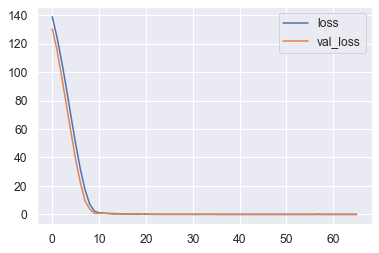

In [93]:
# Plotting the loss and the validation loss
tf_losses[['loss','val_loss']].plot()

In [94]:
# Predicting and saving the results for potential submission
import datetime
import os
save = 0
if (save == 1):
    folder_name = "Results"
    sub_folder =  str(datetime.datetime.now().day) + " Day " + str(datetime.datetime.now().month) + " Month"
    hour_minute_second = str(datetime.datetime.now().hour) +" Hours " + str(datetime.datetime.now().minute) + " Minutes " + str(datetime.datetime.now().second) + " Seconds"
    
    os.makedirs(folder_name,exist_ok=True)
    os.makedirs('Results/'+sub_folder,exist_ok=True)
    os.makedirs('Results/'+sub_folder,exist_ok=True)
    os.makedirs('Results/'+sub_folder+"/"+hour_minute_second,exist_ok=True)
    data = test.drop('SalePrice',axis=1)
    test_df2 = np.asarray(data)
    
    y_pred = pd.DataFrame(model_final.predict(test_df2),columns=['SalePrice'])
    y_pred = pd.concat([temp_test_Id,y_pred],axis=1)
    y_pred['SalePrice'] = y_pred['SalePrice'].apply(lambda x: np.exp(x))
    y_pred.to_csv('Results/'+sub_folder+'/'+hour_minute_second+'/'+'ANN.csv',index=False)